<a href="https://colab.research.google.com/github/quoctrung2005/TTNT/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cài đặt K-NN
Cho 1 tập hợp các điểm trên không gian tọa độ Oxy. Mỗi điểm sẽ có tọa độ (x, y) xác
định. Sử dụng phương pháp k-NN với các dữ liệu trong không gian 2 chiều.


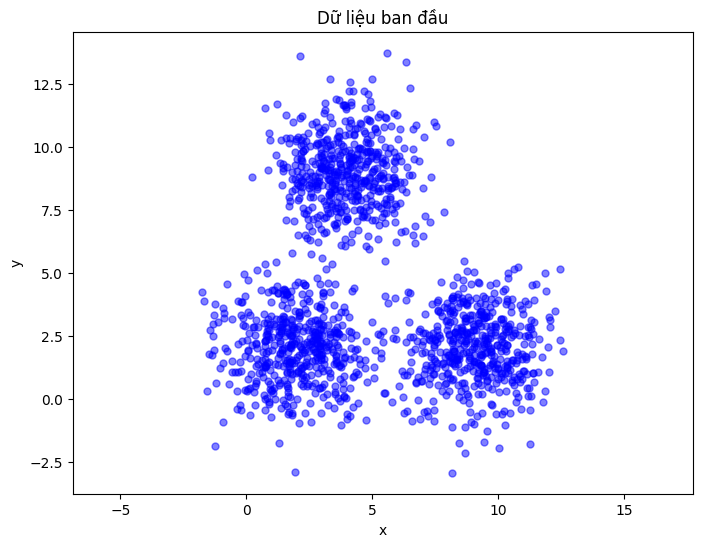

Initial centers: [[ 2.51762485 10.03092835]
 [ 1.92148484  3.50919966]
 [ 4.01021989 -0.58363427]]


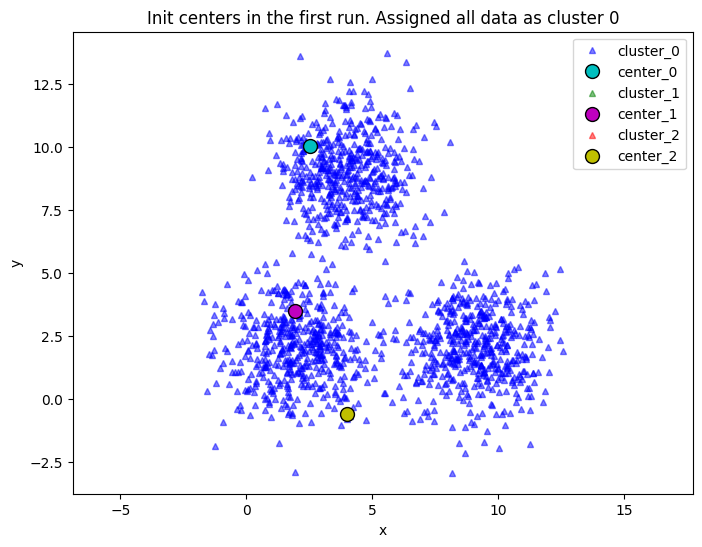

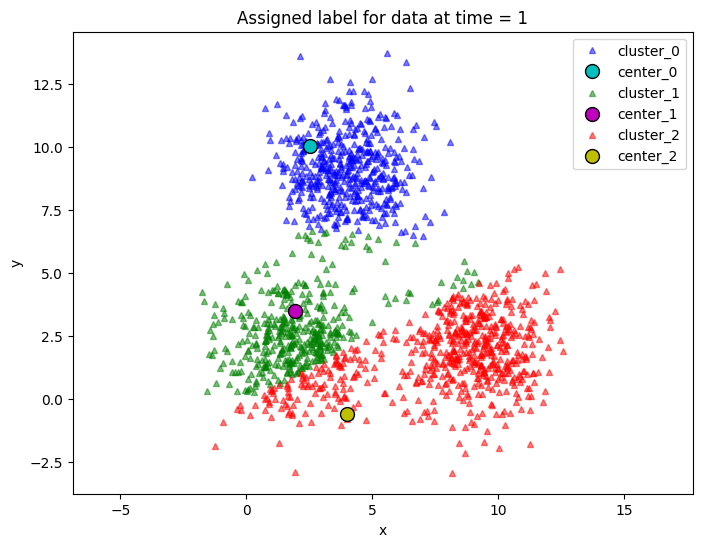

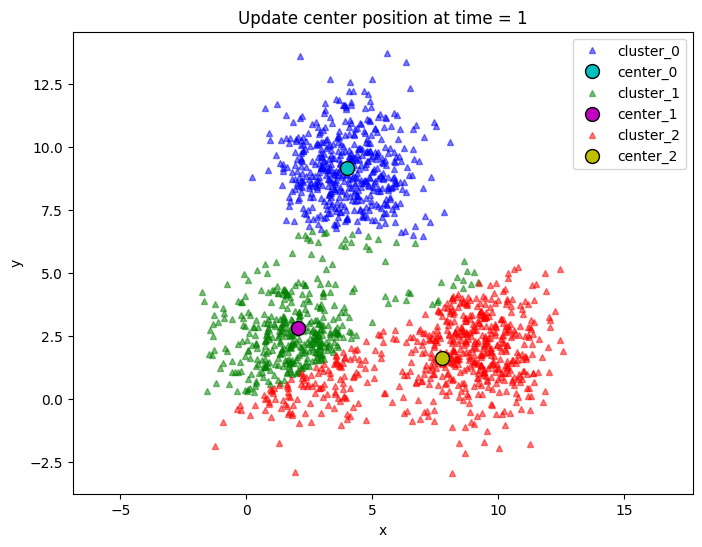

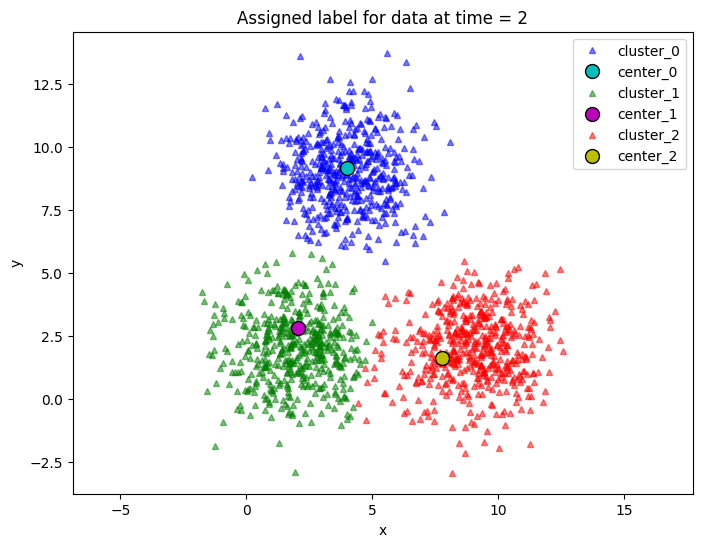

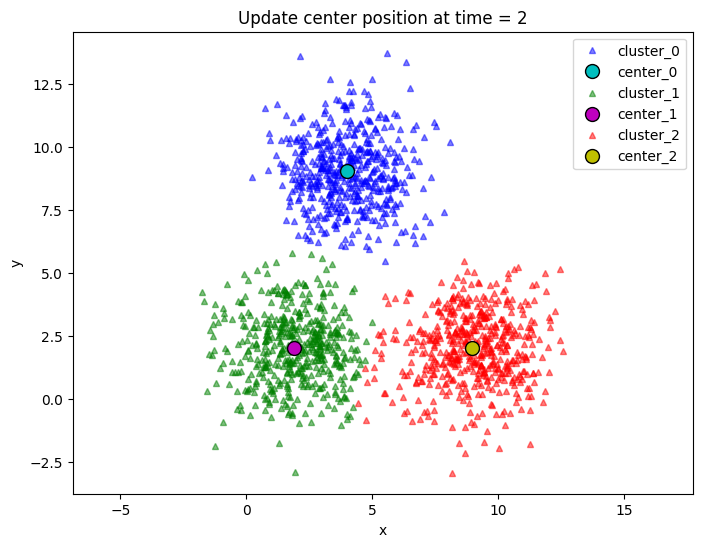

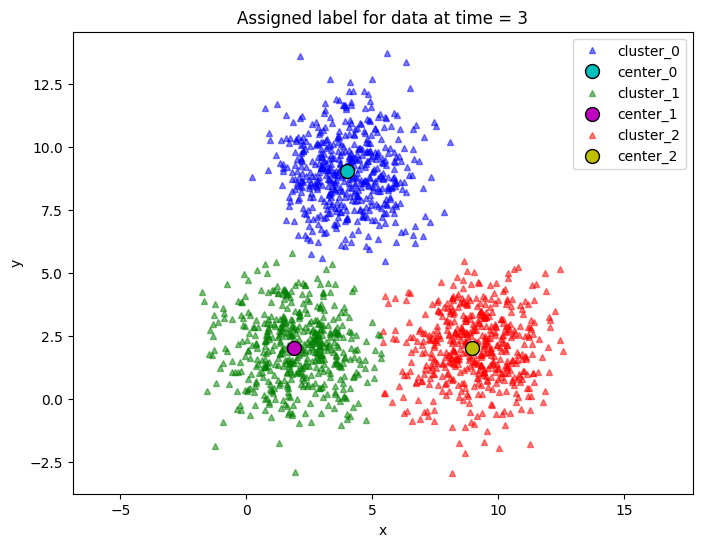

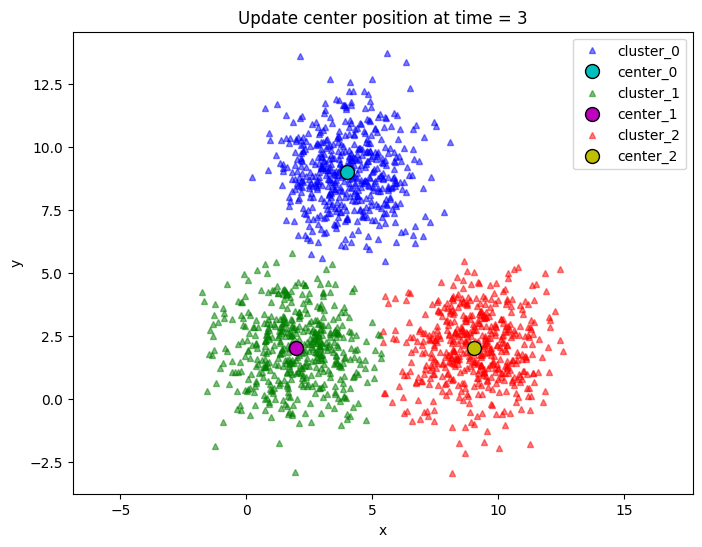

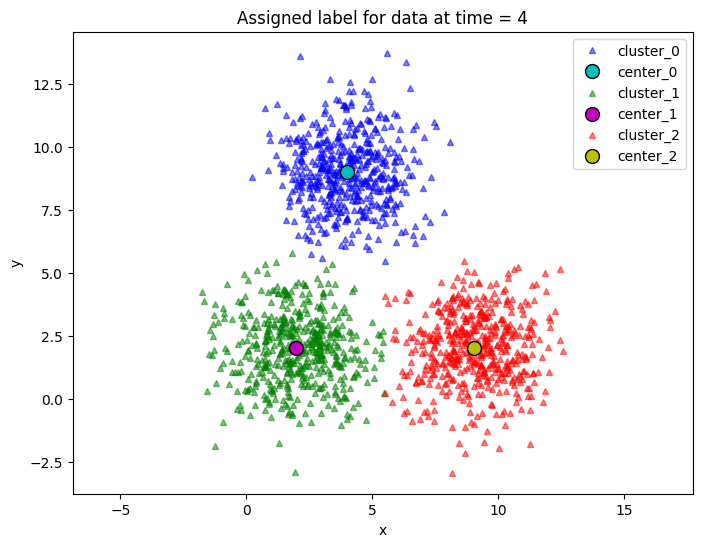

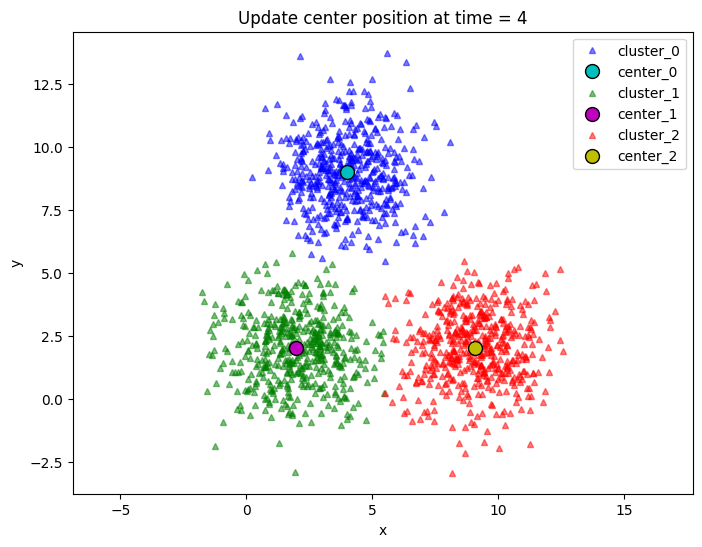

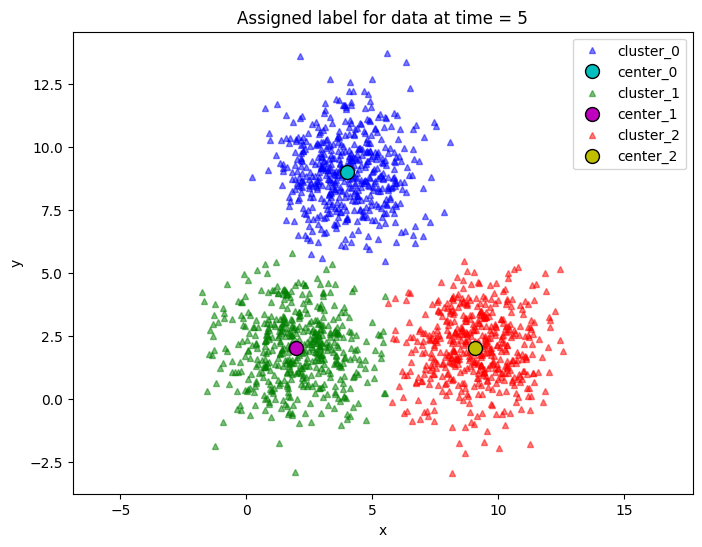

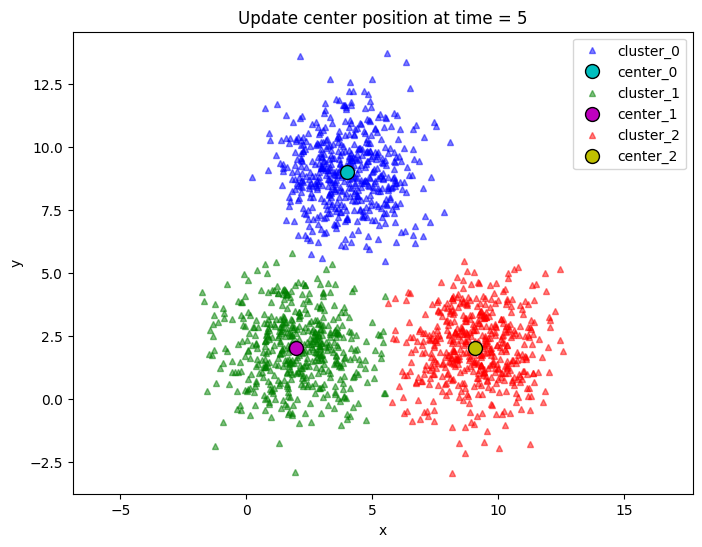

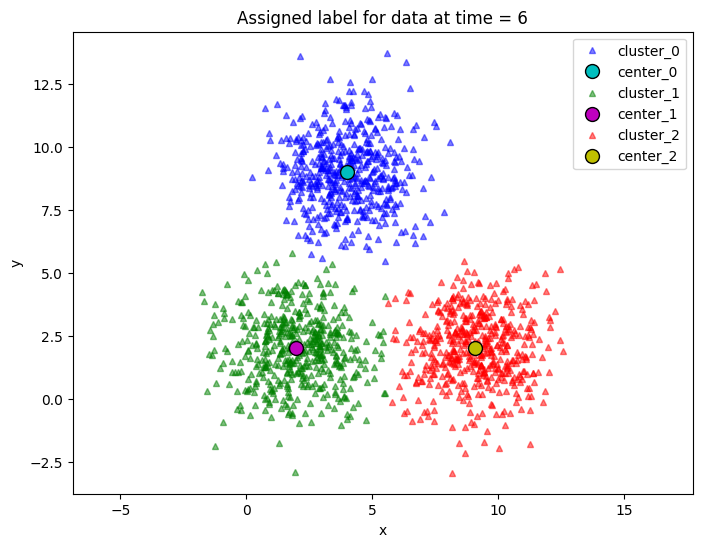

Done! Kmeans has converged after 5 times
Final centers:
 [[3.98620438 9.02948251]
 [1.98764778 2.00796348]
 [9.08867061 2.03100322]]


In [1]:
# Import thư viện
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Đặt seed để kết quả random giống nhau mỗi lần chạy (tùy chọn)
np.random.seed(11)

#Tạo dữ liệu giả lập
means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3

X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis=0)

# Xem phân bố dữ liệu ban đầu
plt.figure(figsize=(8, 6))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dữ liệu ban đầu')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5, alpha=0.5)
plt.axis('equal')
plt.show()

# --- CÁC HÀM HỖ TRỢ K-MEANS ---

# Khởi tạo tâm cụm ngẫu nhiên
def kmeans_init_centers(X, n_cluster):
    # Chọn ngẫu nhiên k dòng từ X để làm tâm ban đầu
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

# Gán nhãn cho các điểm (Tìm tâm gần nhất)
def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    # Trả về index của tâm cụm gần nhất
    return np.argmin(D, axis=1)

# Cập nhật vị trí tâm cụm
def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        # Lấy tất cả các điểm thuộc cụm k
        Xk = X[labels == k, :]
        # Tính trung bình cộng toạ độ (mean)
        centers[k, :] = np.mean(Xk, axis=0)
    return centers

# Kiểm tra hội tụ
def kmeans_has_converged(centers, new_centers):
    # Trả về True nếu tập hợp các tâm cụm không thay đổi
    return (set([tuple(a) for a in centers]) ==
            set([tuple(a) for a in new_centers]))

# Hàm vẽ đồ thị
def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt.figure(figsize=(8, 6))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    # Danh sách màu
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    for i in range(n_cluster):
        data = X[labels == i] # Lấy dữ liệu cụm i
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize=4, label='cluster_' + str(i), alpha=0.5)
        plt.plot(centers[i][0], centers[i][1], plt_colors[i+3] + 'o', markersize=10, label='center_' + str(i), markeredgecolor='k')

    plt.legend()
    plt.axis('equal')
    plt.show()

# Hàm chính thực thi thuật toán
def kmeans(init_centers, init_labels, X, n_cluster):
    centers = init_centers
    labels = init_labels
    times = 0

    while True:
        # Gán nhãn dữ liệu theo tâm cụm hiện tại
        labels = kmeans_predict_labels(X, centers)

        # Vẽ đồ thị minh họa quá trình gán nhãn
        kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))

        # 2. Cập nhật lại tâm cụm mới dựa trên nhãn vừa gán
        new_centers = kmeans_update_centers(X, labels, n_cluster)

        # 3. Kiểm tra hội tụ
        if kmeans_has_converged(centers, new_centers):
            break

        centers = new_centers

        # Vẽ đồ thị sau khi cập nhật tâm
        kmeans_visualize(X, centers, labels, n_cluster, 'Update center position at time = ' + str(times + 1))
        times += 1

    return (centers, labels, times)

# --- THỰC THI CHƯƠNG TRÌNH ---

# Gọi hàm
init_centers = kmeans_init_centers(X, n_cluster)
print("Initial centers:", init_centers)

init_labels = np.zeros(X.shape[0])

kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')

centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

print('Done! Kmeans has converged after', times, 'times')
print('Final centers:\n', centers)